<a href="https://colab.research.google.com/github/Ankit-LASA/Data-Science/blob/main/AnkiBhasU5proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Final: B7 Arredondo

In [ ]:
#Here is the link to a description of my dataset for refernce:
#https://users.stat.ufl.edu/~winner/data/shotgun_spread.txt

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
from scipy.interpolate import PchipInterpolator

# Introduction: Project 5

In my project, I wanted to answer the question: does the distance from a target have a correlation with the spread of shotgun pellets and if so, does it have a linear, exponential, or alternative model?

A shotgun is a type of firearm designed to shoot a cartidge into numerous pellets. These pellets are then split off into different directions, increasing the total blast radius and making it easier to hit a target. This makes it distinct from other guns because their bullets usually remain compact throughout the shot. The shotgun is typically used for hunting or short-range targets due to its wide spread, and it can be outfitted with different calibers (the diameter of bullets) and gauges (the number of pellets that it takes to weigh one pound).

In certain video games, shotguns are 'stronger' when used in short range and deal little to no damage from further away. To observe why, I wanted to compare the effect that distance has on the total blast radius.

# Context

Luckily, I was able to discover a study by W.F. Rowe and S.R. Hanson in 1985 called "Range-of-Fire Estimates from
Regression Analysis Applied to the Spreads of Shotgun Pellets Patterns: Results
of a Blind Study". This collected data on the distance and spread of shotguns at different distances with multiple cartridges.

Below is the data they collected:

In [ ]:
#First, I'll need to load my data. This will be the same as usual.
url_shotgun = 'https://users.stat.ufl.edu/~winner/data/shotgun_spread1.csv'
shotgun = pd.read_csv(url_shotgun,dtype={'Pos':'category'})

In [ ]:
#Here is the data in a chart form for analysis.
shotgun

,cartType,rangeFire,rootA,grpMean,grpVar,grpSD
0,1,10,5.34,5.478333,0.210337,0.458625
1,1,10,4.96,5.478333,0.210337,0.458625
2,1,10,5.44,5.478333,0.210337,0.458625
3,1,10,5.45,5.478333,0.210337,0.458625
4,1,10,6.34,5.478333,0.210337,0.458625
5,1,10,5.34,5.478333,0.210337,0.458625
6,1,20,11.90,10.268333,4.295657,2.072597
7,1,20,7.21,10.268333,4.295657,2.072597
8,1,20,13.06,10.268333,4.295657,2.072597
9,1,20,9.05,10.268333,4.295657,2.072597


From the chart above, please note the following:
*   'cartType' is the cartidge, with 1 referring to the Winchester Western Super X and 2 referring to the Remington No. 4
*   'rangeFire' is the distance in feet from the target, which will hereafter be referred to as distance
*  'rootA' is the square root of the area spread of the shotgun pellets in inches, which will be known as spread here on out

After accounting for the above, the next step is to graph the dataset to observe the trend and evaluate whether it is linear, exponential, etc.



Text(0, 0.5, 'Spread')

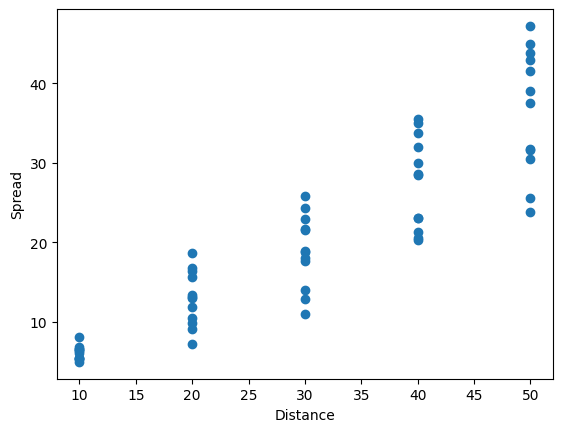

In [ ]:
#Scatterplot of the data, with names adjusted to distance and spread
plt.scatter(shotgun['rangeFire'] , shotgun['rootA'],)
plt.xlabel("Distance")
plt.ylabel("Spread")

The scatterplot reveals a striking linear trend. As the distance incrases, the spread seems to similarly increase proportionally, which shows that it shouldn't be exponential. Additionally, please note that the data was only taken at 10 point intervals.

# Initial Model

Now, I needed to model the dataset and evaluate whether my prediction of a linear correlation matched the observed data.

In [ ]:
#Because we're assuming it is linear, we can use similar code to the exercises.
with pm.Model() as model_shotAll:
    #priors
    α = pm.Normal("α", mu=0, sigma=100)
    β = pm.Normal("β", mu=0, sigma=10)
    #the 'linear' portion of the model
    μ = pm.Deterministic("μ", α + β * shotgun.rangeFire)
    #prior for the standard deviation of the likelihood
    #Cauchy is a T dist with nu = 1
    σ = pm.HalfCauchy("σ", 10)
    #likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed = shotgun.rootA)
    #inference data object
    idata_shotAll = pm.sample()

Output()

Output()

In [ ]:
#Sampling posterior predictive data to use in later models.
pm.sample_posterior_predictive(idata_shotAll, model=model_shotAll,  extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'β'}>,
       <Axes: title={'center': 'σ'}>], dtype=object)

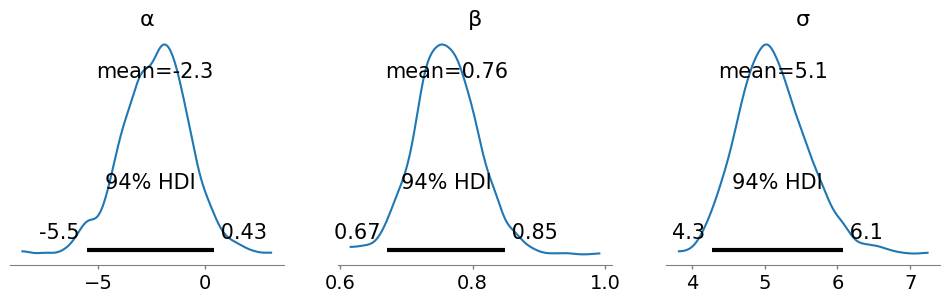

In [ ]:
#Plotting the posterior similar to what we've done in exercises/notes.
az.plot_posterior(idata_shotAll, var_names=["~μ"], figsize=(12, 3))

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:146: UserWarning: Items starting with ~: ['μ'] have not been found and will be ignored
  warnings.warn(


<Axes: xlabel='y_pred'>

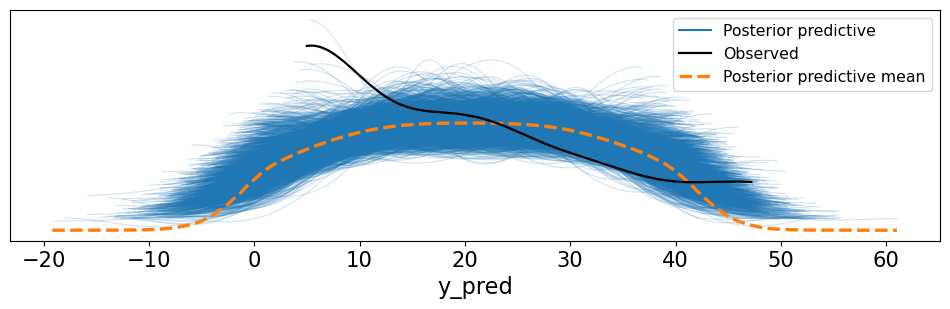

In [ ]:
#Posterior predictive check, as usual
az.plot_ppc(idata_shotAll, var_names=["~μ"], figsize=(12, 3))

The posterior predictive check doesn't look very accurate, so I'll need to try to improve the model to graph it out better.

Text(0, 0.5, 'Spread')

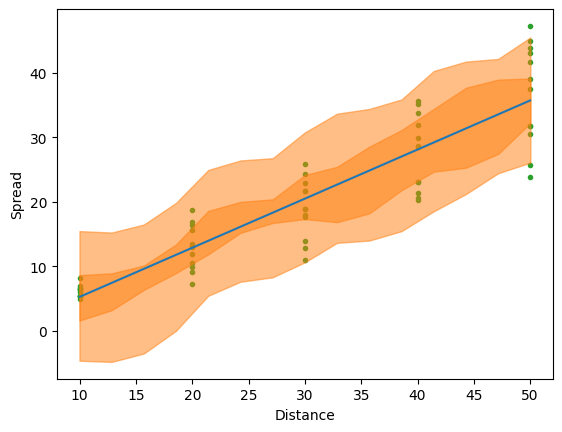

In [ ]:
#Now, with our data, I needed to model the entirety to observe whether it fits the trend.
mean_line = idata_shotAll.posterior["μ"].mean(("chain", "draw"))
#creates some x values to run through the line formula
rangeFire = np.random.normal(shotgun.rangeFire.values, 0.01)
idx = np.argsort(rangeFire)
x = np.linspace(rangeFire.min(), rangeFire.max(), 15)
y_pred_q = idata_shotAll.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(rangeFire[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)
#The following plots the raw data and a line of best fit.
_, ax = plt.subplots()
ax.plot(shotgun.rangeFire, shotgun.rootA, "C2.", zorder=-3)
ax.plot(shotgun.rangeFire[idx], mean_line[idx], c="C0")
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)
#This labels the x and y axises, which was explained above.
ax.set_xlabel("Distance")
ax.set_ylabel("Spread")

While the trend line seems to **roughly** match the observed data, there is a striking amount of variance. The range of the spread is around 15 inches. However, looking at the data, there seemed to be another exogenous factor afflicting the graph. As we noted before, there are two cart types, which could possibly explain why there seems to be two separate sets of data, with one higher and one lower.

# Variable Variance Model

To account for the previously mentioned variance, I wanted to create a new model that accounted for it.

In [ ]:
#Because we're assuming it is linear, we can use similar code to the exercises.
with pm.Model() as model_shotAll:
    #priors for mean line
    α = pm.Normal("α", mu=0, sigma=100)
    β = pm.Normal("β", mu=0, sigma=10)
    #stdv, to account for the variable variance
    x = pm.HalfNormal("x", sigma=100)
    y = pm.HalfNormal("y", sigma=10)
    #lines for deviation and mean
    μ = pm.Deterministic("μ", α + β * shotgun.rangeFire)
    σ = pm.Deterministic("σ", x + y * shotgun.rangeFire)
    #likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed = shotgun.rootA)
    #inference data object
    idata_shotAll = pm.sample()

Output()

Output()

In [ ]:
#Sampling posterior predictive data to use in later models.
pm.sample_posterior_predictive(idata_shotAll, model=model_shotAll,  extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:146: UserWarning: Items starting with ~: ['μ'] have not been found and will be ignored
  warnings.warn(


<Axes: xlabel='y_pred'>

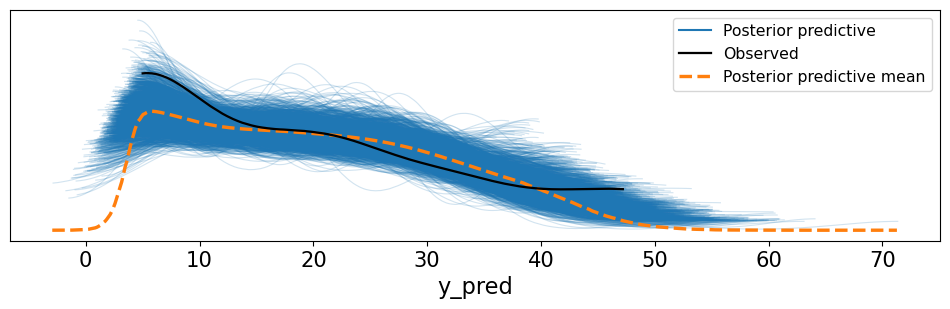

In [ ]:
#no plot posterior to simplify the graphs
#Posterior predictive check, as usual
az.plot_ppc(idata_shotAll, var_names=["~μ"], figsize=(12, 3))

Now, the posterior predictive looks a lot more accurate.

Text(0, 0.5, 'Spread')

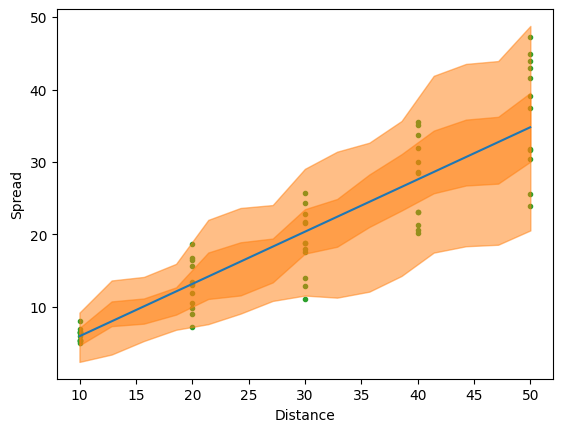

In [ ]:
#this uses the same exact code as before
#Now, with our data, I needed to model the entirety to observe whether it fits the trend.
mean_line = idata_shotAll.posterior["μ"].mean(("chain", "draw"))
#creates some x values to run through the line formula
rangeFire = np.random.normal(shotgun.rangeFire.values, 0.01)
idx = np.argsort(rangeFire)
x = np.linspace(rangeFire.min(), rangeFire.max(), 15)
y_pred_q = idata_shotAll.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(rangeFire[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)
#The following plots the raw data and a line of best fit.
_, ax = plt.subplots()
ax.plot(shotgun.rangeFire, shotgun.rootA, "C2.", zorder=-3)
ax.plot(shotgun.rangeFire[idx], mean_line[idx], c="C0")
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)
#This labels the x and y axises, which was explained above.
ax.set_xlabel("Distance")
ax.set_ylabel("Spread")

Despite the adjustements for the posterior predictive, there's still a lot of variance in the model. To test and see if I can improve the model, I'll separate type1 and type2 (the different shotguns) to see if those external factors are affecting the data itself.

# Final Model

Because my initial model was highly imprecise, I wanted to graph each cart type independently to approximate more accurate the trendline. I'll model type 1 and 2 below, which are each named accordingly.

## Type 1

In [ ]:
#I want to look at each dataset individually, so I have to isolate the first cart.
type1 = shotgun.query("cartType == 1")
#Resetting the index. This is important because otherwise the graph may get distorted.
type1.reset_index(inplace = True, drop = True)

In [ ]:
#printing out the adjusted data set
type1

,cartType,rangeFire,rootA,grpMean,grpVar,grpSD
0,1,10,5.34,5.478333,0.210337,0.458625
1,1,10,4.96,5.478333,0.210337,0.458625
2,1,10,5.44,5.478333,0.210337,0.458625
3,1,10,5.45,5.478333,0.210337,0.458625
4,1,10,6.34,5.478333,0.210337,0.458625
5,1,10,5.34,5.478333,0.210337,0.458625
6,1,20,11.90,10.268333,4.295657,2.072597
7,1,20,7.21,10.268333,4.295657,2.072597
8,1,20,13.06,10.268333,4.295657,2.072597
9,1,20,9.05,10.268333,4.295657,2.072597


Text(0, 0.5, 'Spread')

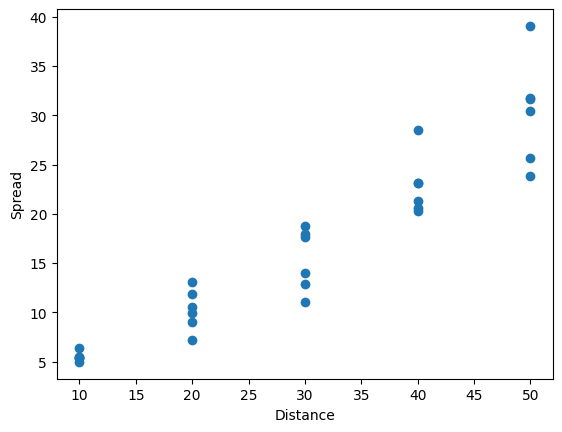

In [ ]:
#plotting out a scatterplot to see the pattern
plt.scatter(type1['rangeFire'] , type1['rootA'],)
plt.xlabel("Distance")
plt.ylabel("Spread")

The scatterplot matches a linear trend, but its average values are lower than the initial model.

In [ ]:
#Now, we need to model the new data linearly to match the scatterplot.
#This will use the same code as the initial, but with different data.
with pm.Model() as model_shotType1:
    α = pm.Normal("α", mu=0, sigma=100)
    β = pm.Normal("β", mu=0, sigma=10)
    #stdv, to account for the variable variance
    x = pm.HalfNormal("x", sigma=100)
    y = pm.HalfNormal("y", sigma=10)
    #lines for deviation and mean
    μ = pm.Deterministic("μ", α + β * type1.rangeFire)
    σ = pm.Deterministic("σ", x + y * type1.rangeFire)
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed = type1.rootA)
    idata_shotType1 = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
#Here, I'm going to take the posterior predictive and plot it to compare it.
pm.sample_posterior_predictive(idata_shotType1, model=model_shotType1,  extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:146: UserWarning: Items starting with ~: ['μ'] have not been found and will be ignored
  warnings.warn(


<Axes: xlabel='y_pred'>

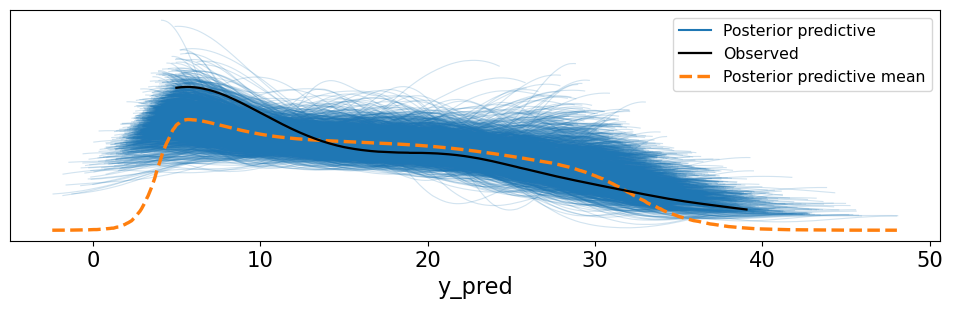

In [ ]:
#Posterior predictive check, as usual
az.plot_ppc(idata_shotType1, var_names=["~μ"], figsize=(12, 3))

Text(0, 0.5, 'Spread')

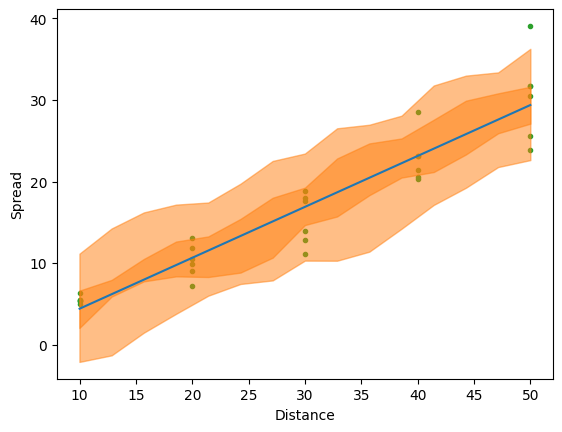

In [ ]:
#Now, the modeling itself with the trendline will be very similar.
#The main difference will be the dataset used.
mean_line = idata_shotType1.posterior["μ"].mean(("chain", "draw"))
rangeFire = np.random.normal(type1.rangeFire.values, 0.01)
idx = np.argsort(rangeFire)
x = np.linspace(rangeFire.min(), rangeFire.max(), 15)
y_pred_q = idata_shotType1.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(rangeFire[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)
_, ax = plt.subplots()
ax.plot(type1.rangeFire, type1.rootA, "C2.", zorder=-3)
ax.plot(type1.rangeFire[idx], mean_line[idx], c="C0")
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)
ax.set_xlabel("Distance")
ax.set_ylabel("Spread")

## Type 2

Next, I'll repeat the same process for the second trendline.

In [ ]:
#This will used the same process as explained above.
#We need to isolate type2 and reset the index to make a new scatterplot.
type2 = shotgun.query("cartType == 2")
type2.reset_index(inplace = True, drop = True)

In [ ]:
#printing out the data. Please note that the index is reset from 0
type2

,cartType,rangeFire,rootA,grpMean,grpVar,grpSD
0,2,10,8.12,6.775000,0.506590,0.711751
1,2,10,6.53,6.775000,0.506590,0.711751
2,2,10,6.89,6.775000,0.506590,0.711751
3,2,10,6.58,6.775000,0.506590,0.711751
4,2,10,6.48,6.775000,0.506590,0.711751
5,2,10,6.05,6.775000,0.506590,0.711751
6,2,20,16.80,15.671667,4.534937,2.129539
7,2,20,13.10,15.671667,4.534937,2.129539
8,2,20,16.44,15.671667,4.534937,2.129539
9,2,20,15.63,15.671667,4.534937,2.129539


Text(0, 0.5, 'Spread')

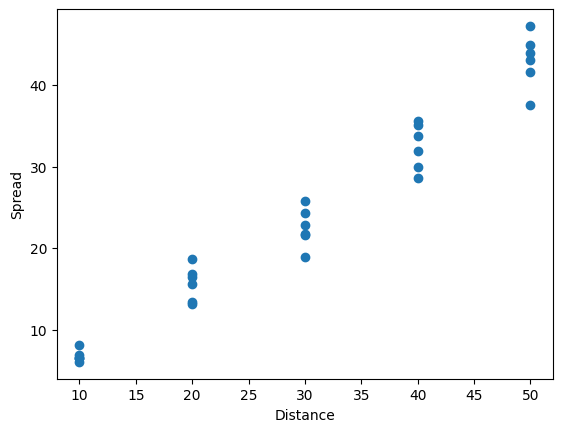

In [ ]:
#Scatterplot of type2 data
plt.scatter(type2['rangeFire'] , type2['rootA'],)
plt.xlabel("Distance")
plt.ylabel("Spread")

This scatterplot also matches a linear trend, but its average values are higher than the initial model.

In [ ]:
#Same linear model explained above.
#Because the scatterplot is linear, we keep the same and adjust the data.
with pm.Model() as model_shotType2:
    #mean line
    α = pm.Normal("α", mu=0, sigma=100)
    β = pm.Normal("β", mu=0, sigma=10)
    #stdv, to account for the variable variance
    x = pm.HalfNormal("x", sigma=100)
    y = pm.HalfNormal("y", sigma=10)
    #lines for deviation and mean
    μ = pm.Deterministic("μ", α + β * type2.rangeFire)
    σ = pm.Deterministic("σ", x + y * type2.rangeFire)
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed = type2.rootA)
    idata_shotType2 = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
#Here, I'm going to take the posterior predictive and plot it to compare it.
pm.sample_posterior_predictive(idata_shotType2, model=model_shotType2,  extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:146: UserWarning: Items starting with ~: ['μ'] have not been found and will be ignored
  warnings.warn(


<Axes: xlabel='y_pred'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


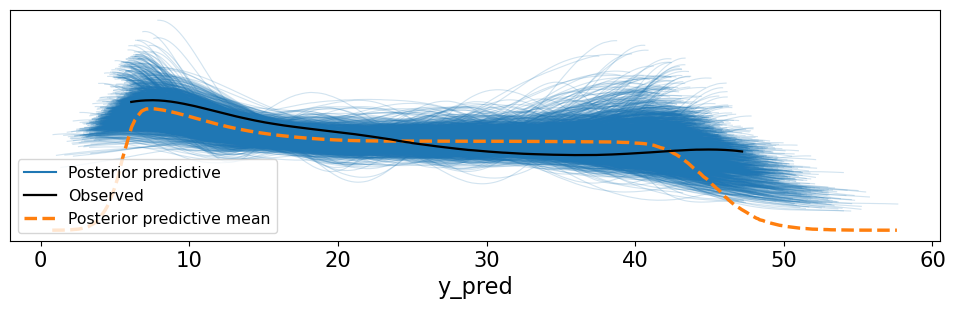

In [ ]:
#Posterior predictive check, as usual
az.plot_ppc(idata_shotType2, var_names=["~μ"], figsize=(12, 3))

Text(0, 0.5, 'Spread')

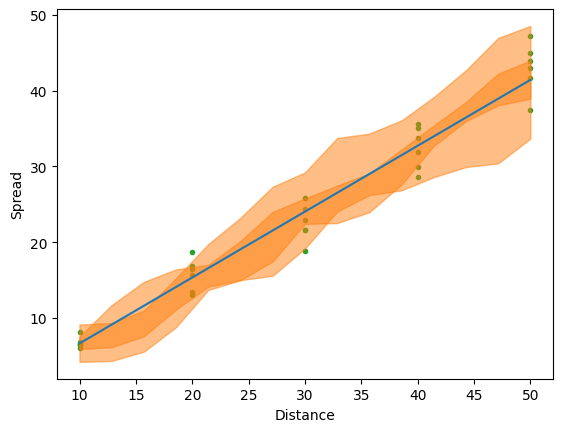

In [ ]:
#Now, the modeling itself with the trendline will be very similar.
#The main difference will be the dataset used.
mean_line = idata_shotType2.posterior["μ"].mean(("chain", "draw"))
rangeFire = np.random.normal(type2.rangeFire.values, 0.01)
idx = np.argsort(rangeFire)
x = np.linspace(rangeFire.min(), rangeFire.max(), 15)
y_pred_q = idata_shotType2.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(rangeFire[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)
_, ax = plt.subplots()
ax.plot(type2.rangeFire, type2.rootA, "C2.", zorder=-3)
ax.plot(type2.rangeFire[idx], mean_line[idx], c="C0")
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)
ax.set_xlabel("Distance")
ax.set_ylabel("Spread")

# Conclusion

Looking at the adjusted trendlines, it is clear that there is a **linear correlation** between the distance from the target and the spread of shotgun pellets. After isolating for the cartidges, the data is significantly more precise and there seems to be a direct proportional increase in distance and spread. This indicates that **other factors**, including the cartridge type (ie Winchester Western Super X or the Remington No. 4) and guage, can affect the spread of pellets independently of its distance.

However, there is still a moderate amount of uncertainty in the data. This is likely occuring due to a couple of factors. One, the data set is very small, with only 59 samples across the two models. Secondly, the data only captures data at distance points of 10 feet which makes it diffucult to accurately model the data throughout the set.

These inconsistencies can be fixed in the future by capturing more  data at multiple different distance points with a single cartidge type. This eliminates external factors and helps to isolate the distance itself.

Regardless, the trend indicates why video games give shotguns more 'power' when the target is closer. If they are futher away, the pellets will spread out further. This means that less individual pellets would land on the target, reducing the blunt force of the shot and explaining why shotguns are generally more powerful short-range.

# Extra Testing

Here is some rudimentary testing I tried for type1. It's incomplete (so there may be some errors) but as far as I can tell, it doesn't correlate very well with an exponential model compared to the linear model from above which will be clear if you take a look at the PPCs.

First, I did an exponential model without variable variance

In [56]:
#Now, we need to model the new data linearly to match the scatterplot.
#This will use the same code as the initial, but with different data.
with pm.Model() as model_shotType1:
    α = pm.Normal("α", mu=0, sigma=100)
    β = pm.Normal("β", mu=0, sigma=10)
    #lines for deviation and mean
    μ = pm.Deterministic("μ", pm.math.exp(α + β * type1.rangeFire))
    σ = pm.HalfNormal("σ", sigma = 10)
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed = type1.rootA)
    idata_shotType1 = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


In [57]:
#Here, I'm going to take the posterior predictive and plot it to compare it.
pm.sample_posterior_predictive(idata_shotType1, model=model_shotType1,  extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:146: UserWarning: Items starting with ~: ['μ'] have not been found and will be ignored
  warnings.warn(


<Axes: xlabel='y_pred'>

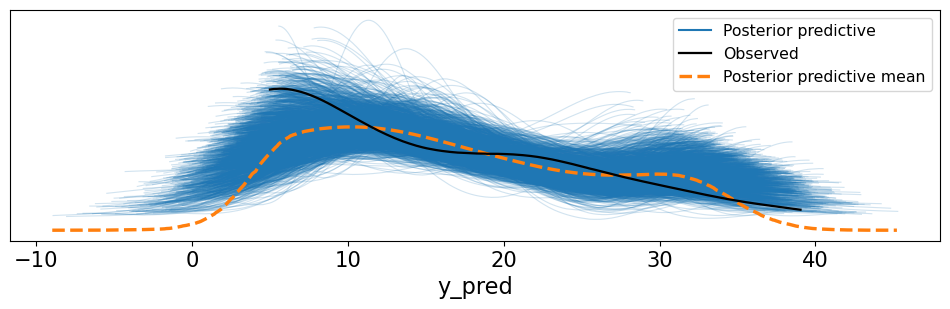

In [58]:
#Posterior predictive check, as usual
az.plot_ppc(idata_shotType1, var_names=["~μ"], figsize=(12, 3))

Text(0, 0.5, 'Spread')

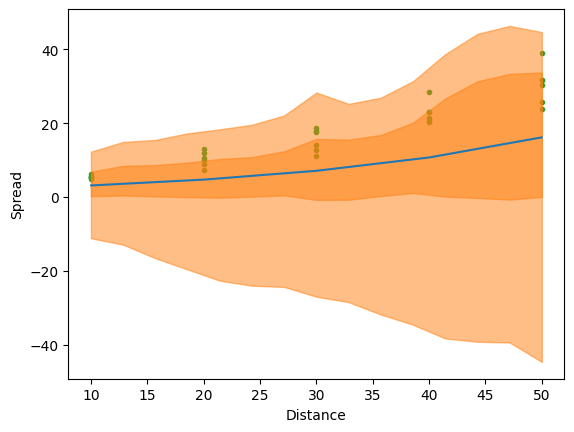

In [63]:
#Now, the modeling itself with the trendline will be very similar.
#The main difference will be the dataset used.
mean_line = idata_shotType1.posterior["μ"].mean(("chain", "draw"))
rangeFire = np.random.normal(type1.rangeFire.values, 0.01)
idx = np.argsort(rangeFire)
x = np.linspace(rangeFire.min(), rangeFire.max(), 15)
y_pred_q = idata_shotType1.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(rangeFire[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)
_, ax = plt.subplots()
ax.plot(type1.rangeFire, type1.rootA, "C2.", zorder=-3)
ax.plot(type1.rangeFire[idx], mean_line[idx], c="C0")
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)
ax.set_xlabel("Distance")
ax.set_ylabel("Spread")

Then, I tried it with variable variance

In [59]:
#Now, we need to model the new data linearly to match the scatterplot.
#This will use the same code as the initial, but with different data.
with pm.Model() as model_shotType1:
    α = pm.Normal("α", mu=0, sigma=100)
    β = pm.Normal("β", mu=0, sigma=10)
    #stdv, to account for the variable variance
    x = pm.HalfNormal("x", sigma=100)
    y = pm.HalfNormal("y", sigma=10)
    #lines for deviation and mean
    μ = pm.Deterministic("μ", pm.math.exp(α + β * type1.rangeFire))
    σ = pm.Deterministic("σ", x + y * type1.rangeFire)
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed = type1.rootA)
    idata_shotType1 = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:There were 787 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [60]:
#Here, I'm going to take the posterior predictive and plot it to compare it.
pm.sample_posterior_predictive(idata_shotType1, model=model_shotType1,  extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:146: UserWarning: Items starting with ~: ['μ'] have not been found and will be ignored
  warnings.warn(


<Axes: xlabel='y_pred'>

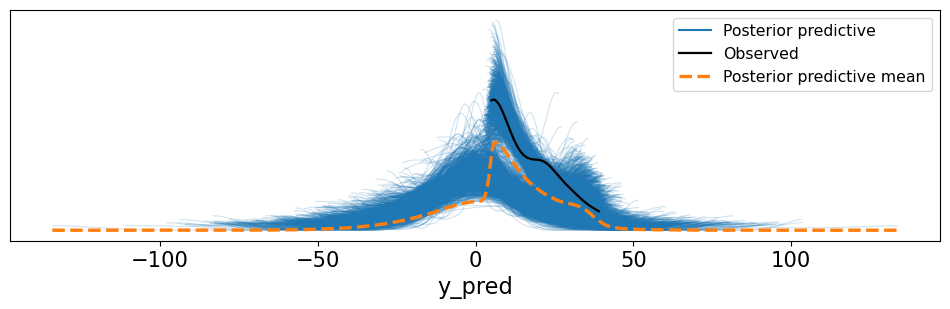

In [61]:
#Posterior predictive check, as usual
az.plot_ppc(idata_shotType1, var_names=["~μ"], figsize=(12, 3))

Text(0, 0.5, 'Spread')

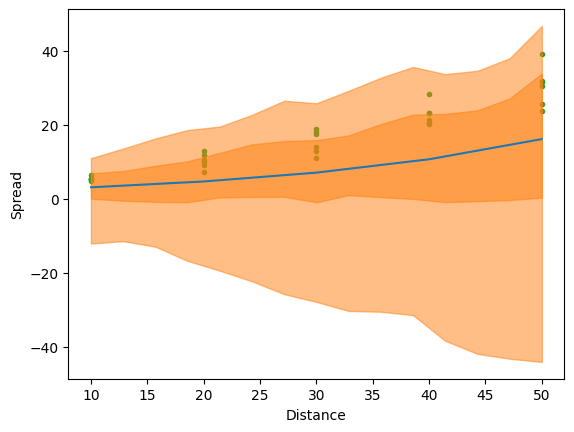

In [62]:
#Now, the modeling itself with the trendline will be very similar.
#The main difference will be the dataset used.
mean_line = idata_shotType1.posterior["μ"].mean(("chain", "draw"))
rangeFire = np.random.normal(type1.rangeFire.values, 0.01)
idx = np.argsort(rangeFire)
x = np.linspace(rangeFire.min(), rangeFire.max(), 15)
y_pred_q = idata_shotType1.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(rangeFire[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)
_, ax = plt.subplots()
ax.plot(type1.rangeFire, type1.rootA, "C2.", zorder=-3)
ax.plot(type1.rangeFire[idx], mean_line[idx], c="C0")
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)
ax.set_xlabel("Distance")
ax.set_ylabel("Spread")